#### Assignment_6_Weather
#### Author: Roisin Stanley
#### Data from: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv
 

##### Plots of

The temperature

The mean temperature each day

The mean temperature for each month

and

The Windspeed (there is data missing from this column)

The rolling windspeed (say over 24 hours)

The max windspeed for each day

The monthly mean of the daily max windspeeds

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url ='https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'



Struggled with this initially but used (https://datascientyst.com/drop-bad-lines-with-read_csv-pandas/)

In [38]:
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

try:
    data = pd.read_csv(url, error_bad_lines=False)
    print("Data loaded successfully!")
    display(data.head())  
except Exception as e:
    print(f"Error loading data: {e}")

Error loading data: read_csv() got an unexpected keyword argument 'error_bad_lines'


In [39]:
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

try:
    data = pd.read_csv(url, delimiter=',')
    print("Data loaded successfully!")
    display(data.head())  
except Exception as e:
    print(f"Error loading data: {e}")

Error loading data: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2



In [40]:
import requests

response = requests.get(url)
lines = response.text.split('\n')

# Print the first few lines to inspect
for line in lines[:10]:
    print(line)

Station Name: KNOCK AIRPORT
Station Height: 201 M 
Latitude:53.906  ,Longitude: -8.817


date:  -  Date and Time (utc)
rain:  -  Precipitation Amount (mm)	  
temp:  -  Air Temperature (C)	
wetb:  -  Wet Bulb Temperature (C)
dewpt: -  Dew Point Temperature (C)             


In [41]:
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

# Read the CSV file, skipping the first 7 lines and handling bad lines
try:
    data = pd.read_csv(url, skiprows=7, on_bad_lines='skip', delimiter=',')
    print("Data loaded successfully!")
    display(data.head())
except Exception as e:
    print(f"Error loading data: {e}")

Data loaded successfully!


,temp: - Air Temperature (C)\t
0,wetb: - Wet Bulb Temperature (C)
1,dewpt: - Dew Point Temperature (C)
2,rhum: - Relative Humidity (%)
3,vappr: - Vapour Pressure (hPa)\t
4,msl: - Mean Sea Level Pressure (hPa)


In [42]:
# URL of the CSV file
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

# Load the data
data = pd.read_csv(url, skiprows=7, on_bad_lines='skip', delimiter=',')

# Display the first few rows to inspect the data
data.head()

,temp: - Air Temperature (C)\t
0,wetb: - Wet Bulb Temperature (C)
1,dewpt: - Dew Point Temperature (C)
2,rhum: - Relative Humidity (%)
3,vappr: - Vapour Pressure (hPa)\t
4,msl: - Mean Sea Level Pressure (hPa)


In [43]:
print(data.columns)


Index(['temp:  -  Air Temperature (C)\t'], dtype='object')


In [44]:
data.columns = data.columns.str.strip()
print(data.columns)

Index(['temp:  -  Air Temperature (C)'], dtype='object')


In [45]:
# Remove leading/trailing spaces from column names
data.columns = data.columns.str.strip()
print(data.columns)

Index(['temp:  -  Air Temperature (C)'], dtype='object')


In [47]:
# Ensure the correct column name
temperature_column = 'temp:  -  Air Temperature (C)'
datetime_column = 'date:  -  Date and Time (utc)'

# Convert the 'Date and Time (utc)' column to datetime
data[datetime_column] = pd.to_datetime(data[datetime_column])

# Plot the temperature
plt.figure(figsize=(14, 7))
plt.plot(data[datetime_column], data[temperature_column], label='Temperature')
plt.title('Hourly Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


KeyError: 'date:  -  Date and Time (utc)'

c:\Users\Roisin\anaconda324\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


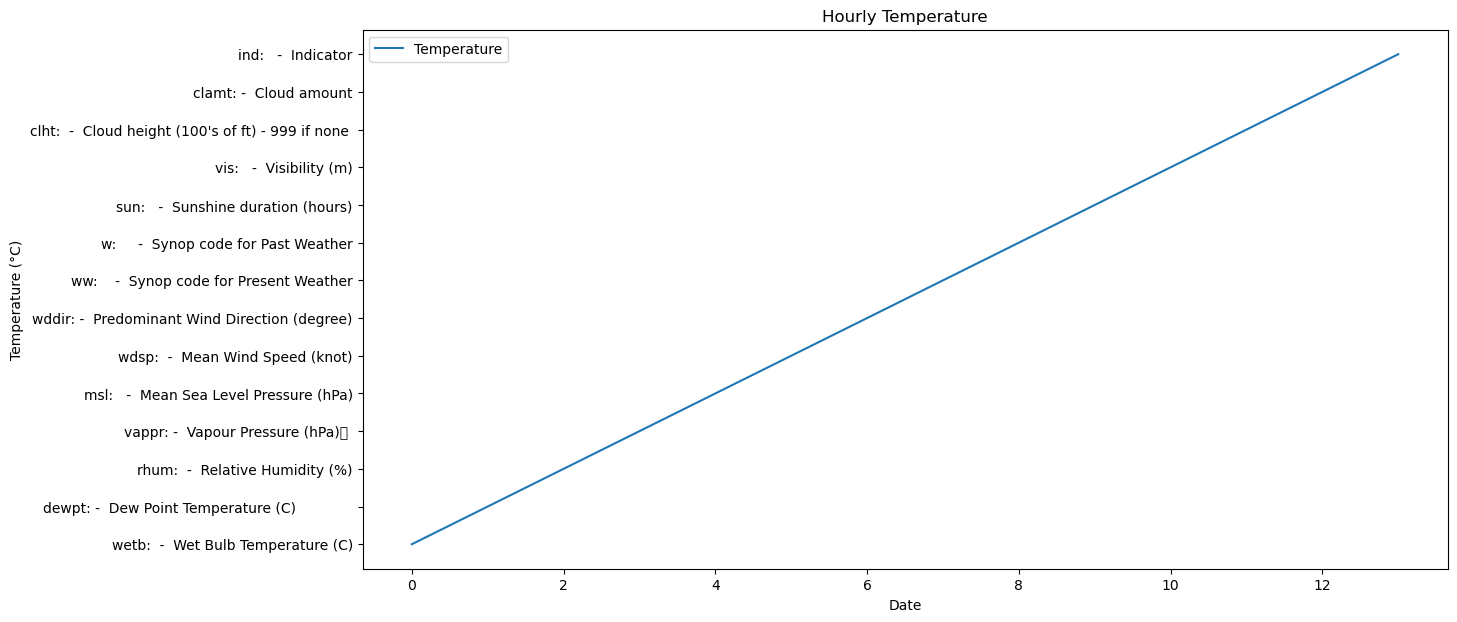

In [48]:
# Plot the temperature using the correct column name
plt.figure(figsize=(14, 7))
plt.plot(data['temp:  -  Air Temperature (C)'], label='Temperature')
plt.title('Hourly Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [49]:
# Inspect column names to find the correct datetime column name
print(data.columns)

# Use the correct column name for datetime conversion
datetime_column = 'date: - Date and Time (utc)' 
# Convert the datetime column to datetime format

data[datetime_column] = pd.to_datetime(data[datetime_column])

# Set the datetime column as index
data.set_index(datetime_column, inplace=True)

  #Ensure temperature_column = 'temp: - Air Temperature (C)'
#Calculate daily mean temperature
data['Daily Mean Temperature'] = data[temperature_column].resample('D').mean()
 
 #Plot daily mean temperature
plt.figure(figsize=(14, 7))
plt.plot(data['Daily Mean Temperature'], label='Daily Mean Temperature')
plt.title('Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')


Index(['temp:  -  Air Temperature (C)'], dtype='object')


KeyError: 'date: - Date and Time (utc)'

In [28]:
#

# Convert the 'Date and Time (utc)' column to datetime
data['Date and Time (utc)'] = pd.to_datetime(data['Date and Time (utc)'])

# Calculate daily mean temperature
data.set_index('Date and Time (utc)', inplace=True)
data['Daily Mean Temperature'] = data['temp: - Air Temperature (C)'].resample('D').mean()

# Plot daily mean temperature plt.figure(figsize=(14, 7))
plt.plot(data['Daily Mean Temperature'], label='Daily Mean Temperature')
plt.title('Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()



KeyError: "None of ['Date and Time (utc)'] are in the columns"

In [ ]:
# Calculate and plot mean temp for each month

# Calculate monthly mean temperature
data['Monthly Mean Temperature'] =data['temp: - Air Temperature (C)'].resample('M').mean()

 
# Plot monthly mean temperature 
plt.figure(figsize=(14, 7))
plt.plot(data['Monthly Mean Temperature'], label='Monthly Mean Temperature')
plt.title('Monthly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [ ]:
# Plot the windspeed using the correct column name

plt.figure(figsize=(14, 7))
plt.plot(data['ws: - Windspeed (km/h)'], label='Windspeed')
plt.title('Hourly Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')
plt.legend()
plt.show()

In [ ]:
# Calculate rolling windspeed over 24 hours
data['Rolling Windspeed'] = data['ws: - Windspeed (km/h)'].rolling(window=24).mean()

#Plot rolling windspeed
plt.figure(figsize=(14, 7))
plt.plot(data['Rolling Windspeed'], label='Rolling Windspeed (24h)')
plt.title('24-Hour Rolling Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')
plt.legend()



In [41]:
# Cal daily max windspeed
data['Daily Max Windspeed'] = data['Windspeed (km/h)'].resample('D').max()

# Plotting daily max windspeed
plt.figure(figsize=(14, 7))
plt.plot(data['Daily Max Windspeed'], label='Daily Max Windspeed')
plt.title('Daily Max Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')
plt.legend()
plt.show()

KeyError: 'Windspeed (km/h)'

In [ ]:
# Calculate monthly mean of daily max windspeeds
data['Monthly Mean of Daily Max Windspeeds'] = data['Daily Max Windspeed'].resample('M').mean()

# Plot monthly mean of daily max windspeeds
plt.figure(figsize=(14, 7))
plt.plot(data['Monthly Mean of Daily Max Windspeeds'], label='Monthly Mean of Daily Max Windspeeds')
plt.title('Monthly Mean of Daily Max Windspeeds')
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')
plt.legend()
plt.show()
